# Generate train and test BEV map splits for NuScenes

Split train and test data so there would not be overlappping BEV map region

This is based on the locations where the scenes are logged.

## Initialize (variables)

In [19]:
%load_ext autoreload
%autoreload 2
from nuscenes.nuscenes import NuScenes
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt 
from PIL import Image
import yaml

import sys 
import os 

sys.path.insert(0, os.path.abspath('..'))
from scripts.split_nuscenes import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# generally trainval takes 1 minute to initialize
dataroot = '/ocean/projects/cis220039p/cherieho/data/datasets/nuscenes/nuscenes_full'
nusc = NuScenes(version='v1.0-trainval', dataroot=dataroot, verbose=True)

Loading NuScenes tables for version v1.0-trainval...


23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 36.037 seconds.
Reverse indexing ...
Done reverse indexing in 13.5 seconds.


In [25]:
# variables

# Test point decision rationale: 
# R1: target around 10% of total scenes being test
# R2: decent amount of corners and turns (not just straightaways)
split_config = '../configs/nuscenes_split/test_0628.yml'

with open(split_config, 'r') as file:
    split_config_dict = yaml.safe_load(file)

{'singapore-onenorth': {'test_point': [350, 900], 'dist_threshold': 200},
 'boston-seaport': {'test_point': [1200, 1500], 'dist_threshold': 200},
 'singapore-hollandvillage': {'test_point': [1500, 1300],
  'dist_threshold': 200},
 'singapore-queenstown': {'test_point': [700, 1500], 'dist_threshold': 200}}

Get pose from location:   1%|          | 1/183 [00:00<00:27,  6.52it/s]

Get pose from location: 100%|██████████| 183/183 [00:00<00:00, 186.90it/s]


getting test split


Get train/test split: 100%|██████████| 183/183 [00:00<00:00, 2329.54it/s]


# Total Scenes: 183
# Train Scenes: 141, 77.0% of total
# Test Scenes: 42, 23.0% of total


Plot trajectories: 100%|██████████| 183/183 [00:00<00:00, 324.30it/s]


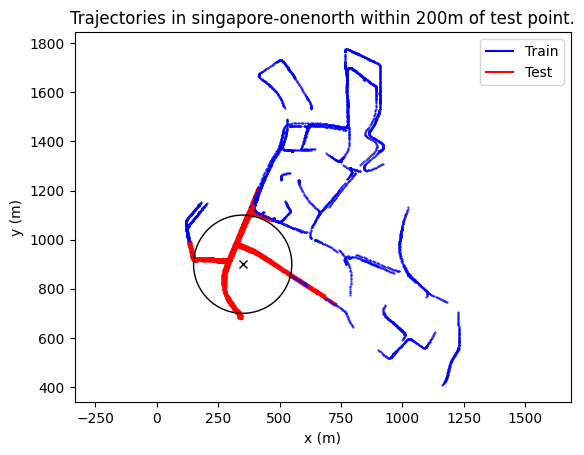

Removing scene-0499 from list of scenes.
Removing scene-0515 from list of scenes.


Get pose from location: 100%|██████████| 465/465 [00:01<00:00, 264.80it/s]


getting test split


Get train/test split: 100%|██████████| 465/465 [00:00<00:00, 49968.01it/s]


# Total Scenes: 465
# Train Scenes: 430, 92.0% of total
# Test Scenes: 35, 8.0% of total


Plot trajectories: 100%|██████████| 465/465 [00:00<00:00, 508.31it/s]


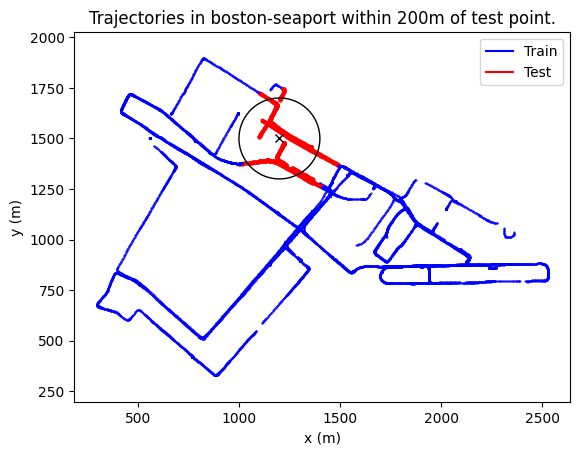

Get pose from location: 100%|██████████| 85/85 [00:00<00:00, 228.38it/s]


getting test split


Get train/test split: 100%|██████████| 85/85 [00:00<00:00, 38310.32it/s]


# Total Scenes: 85
# Train Scenes: 72, 85.0% of total
# Test Scenes: 13, 15.0% of total


Plot trajectories: 100%|██████████| 85/85 [00:00<00:00, 736.25it/s]


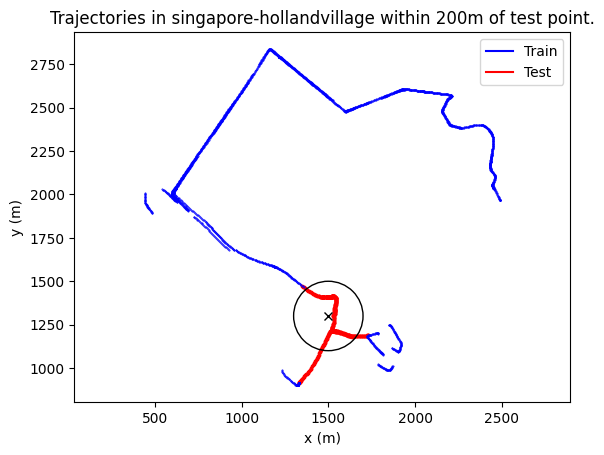

Get pose from location: 100%|██████████| 115/115 [00:00<00:00, 247.44it/s]


getting test split


Get train/test split: 100%|██████████| 115/115 [00:00<00:00, 45205.71it/s]


# Total Scenes: 115
# Train Scenes: 96, 83.0% of total
# Test Scenes: 19, 17.0% of total


Plot trajectories: 100%|██████████| 115/115 [00:00<00:00, 727.65it/s]


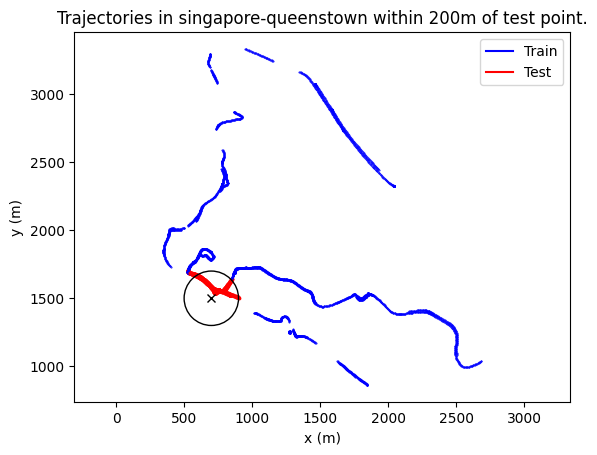

In [26]:
for location in split_config_dict.keys():
    test_point = split_config_dict[location]['test_point']
    dist_threshold = split_config_dict[location]['dist_threshold']
    scene_tokens_in_location = get_scene_tokens(nusc, location)
    posedict = get_pose_dict_given_scenes(nusc, scene_tokens_in_location)
    split_dict = get_train_test_split_dict_from_testpoint(posedict, test_point, dist_threshold)
    plot_traj_colored_by_traintest(posedict, split_dict, test_point, dist_threshold, location)